In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
# data does not have headers included
df = pd.read_csv("wdbc.data", header=None)
print(df.head())

# need to add column headers
df.columns = ["id", "diagnosis", "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1", "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2", "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"]
print(df.head())

# creating a column to map diagnosis values
# 1 is malignant and 0 is benign 
df['diagnosis_code'] = df['diagnosis'].map({'M': 1, 'B': 0})


         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

In [5]:
feature_cols = [col for col in df.columns if col not in ['id', 'diagnosis', 'diagnosis_code']]
X = df[feature_cols].values
y = df['diagnosis_code'].values

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, output, learning_rate):
        # Backward propagation
        m = X.shape[0]
        
        # Output layer error
        dz2 = output - y.reshape(-1, 1)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer error
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    
    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))
        return loss
    
    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(y.reshape(-1, 1), output)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y, output, learning_rate)
            
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')
        
        return losses
    
    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)


Training Neural Network...
Epoch 100/1000, Loss: 0.5051
Epoch 200/1000, Loss: 0.2446
Epoch 300/1000, Loss: 0.1473
Epoch 400/1000, Loss: 0.1123
Epoch 500/1000, Loss: 0.0953
Epoch 600/1000, Loss: 0.0854
Epoch 700/1000, Loss: 0.0790
Epoch 800/1000, Loss: 0.0744
Epoch 900/1000, Loss: 0.0709
Epoch 1000/1000, Loss: 0.0681

Training Accuracy: 0.9824
Test Accuracy: 0.9825

Classification Report (Test Set):
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        71
   Malignant       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix (Test Set):
[[70  1]
 [ 1 42]]


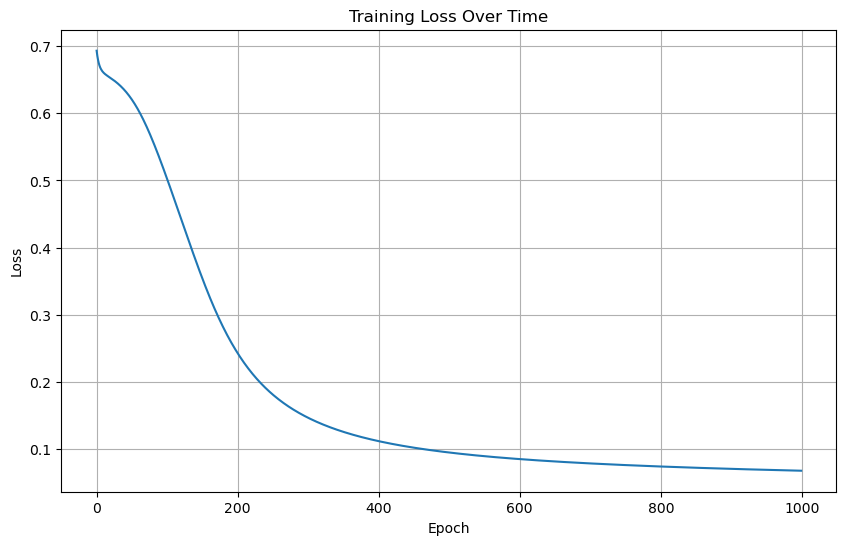

In [8]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 16
output_size = 1

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)

print("Training Neural Network...")
losses = nn.train(X_train, y_train, epochs=1000, learning_rate=0.1)

# Make predictions
y_train_pred = nn.predict(X_train).flatten()
y_test_pred = nn.predict(X_test).flatten()

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'\nTraining Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print('\nClassification Report (Test Set):')
print(classification_report(y_test, y_test_pred, target_names=['Benign', 'Malignant']))

print('\nConfusion Matrix (Test Set):')
print(confusion_matrix(y_test, y_test_pred))

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()